**Source / Referrence**

1. Stack Over Flow
2. AAIC referrence I python notebooks and video 
3. Help from AAIC students. 
4. Towards datascience. 

# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_data.csv to preprocessed_data.csv


In [0]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [4]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,project_title
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,Educational Support for English Learners at Home
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,Wanted: Projector for Hungry Learners


In [5]:
data.shape

(109248, 10)

In [0]:
### Separating the class label from our data. 
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [7]:
# importing libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from tqdm import tqdm

from scipy.sparse import hstack

from sklearn.naive_bayes import MultinomialNB

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [8]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(49041, 9) (49041,)
(24155, 9) (24155,)
(36052, 9) (36052,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
unique_words_bow = []
unique_words_tfidf = []

In [10]:
### SET - 1 (categorical, numerical features + preprocessed_eassay (BOW))
### essay

vectorizer_bow = CountVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer_bow.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer_bow.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer_bow.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer_bow.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print('*' * 20)
for val in vectorizer_bow.get_feature_names():
    unique_words_bow.append(val)
    
print(len(unique_words_bow))    

After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)
********************
5000


In [11]:
### SET - 2 (categorical, numerical features + preprocessed_eassay (TFIDF))
### Essay

vectorizer_tfidf = TfidfVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer_tfidf.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer_tfidf.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer_tfidf.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print('*' * 20)
for val in vectorizer_tfidf.get_feature_names():
    unique_words_tfidf.append(val)
    
print(len(unique_words_tfidf))

After vectorizations
(49041, 5000) (49041,)
(24155, 5000) (24155,)
(36052, 5000) (36052,)
********************
5000


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [12]:
## Performing one hot encoding on categorical features like school_state, teacher_prefix, project_grade_category
## Apply encoding on categorical features and numerical features
## Project Title.

vectorizer_bow_2 = CountVectorizer(min_df=10, max_features=5000)
vectorizer_bow_2.fit(X_train['project_title'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_bow = vectorizer_bow_2.transform(X_train['project_title'].values.astype('U'))
X_cv_title_bow = vectorizer_bow_2.transform(X_cv['project_title'].values.astype('U'))
X_test_title_bow = vectorizer_bow_2.transform(X_test['project_title'].values.astype('U'))

print("After vectorizations")
print(X_train_title_bow.shape, y_train.shape)
print(X_cv_title_bow.shape, y_cv.shape)
print(X_test_title_bow.shape, y_test.shape)
print('*' * 20)
for val in vectorizer_bow_2.get_feature_names():
    unique_words_bow.append(val)
    
print(len(unique_words_bow))

After vectorizations
(49041, 2103) (49041,)
(24155, 2103) (24155,)
(36052, 2103) (36052,)
********************
7103


In [13]:
vectorizer_tfidf_2 = TfidfVectorizer(min_df=10, max_features=5000)
vectorizer_tfidf_2.fit(X_train['project_title'].values.astype('U')) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_title_tfidf = vectorizer_tfidf_2.transform(X_train['project_title'].values.astype('U'))
X_cv_title_tfidf = vectorizer_tfidf_2.transform(X_cv['project_title'].values.astype('U'))
X_test_title_tfidf = vectorizer_tfidf_2.transform(X_test['project_title'].values.astype('U'))

print("After vectorizations")
print(X_train_title_tfidf.shape, y_train.shape)
print(X_cv_title_tfidf.shape, y_cv.shape)
print(X_test_title_tfidf.shape, y_test.shape)
print('*' * 20)
for val in vectorizer_tfidf_2.get_feature_names():
    unique_words_tfidf.append(val)
    
print(len(unique_words_tfidf))

After vectorizations
(49041, 2103) (49041,)
(24155, 2103) (24155,)
(36052, 2103) (36052,)
********************
7103


In [14]:
## SET - 1 & SET -2
## teacher_prefix

vectorizer3 = CountVectorizer()
vectorizer3.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer3.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe = vectorizer3.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer3.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_cv_teacher_ohe.shape, y_cv.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print('*' * 20)
for val in vectorizer3.get_feature_names():
    unique_words_bow.append(val)
    unique_words_tfidf.append(val)
    
print(len(unique_words_bow))
print(len(unique_words_tfidf))

After vectorizations
(49041, 5) (49041,)
(24155, 5) (24155,)
(36052, 5) (36052,)
********************
7108
7108


In [15]:
## school_state

vectorizer4 = CountVectorizer()
vectorizer4.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer4.transform(X_train['school_state'].values)
X_cv_state_ohe = vectorizer4.transform(X_cv['school_state'].values)
X_test_state_ohe = vectorizer4.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_cv_state_ohe.shape, y_cv.shape)
print(X_test_state_ohe.shape, y_test.shape)
print('*' * 20)
for val in vectorizer4.get_feature_names():
    unique_words_bow.append(val)
    unique_words_tfidf.append(val)
    
print(len(unique_words_bow))
print(len(unique_words_tfidf))


After vectorizations
(49041, 51) (49041,)
(24155, 51) (24155,)
(36052, 51) (36052,)
********************
7159
7159


In [16]:
## project_grade_category

vectorizer5 = CountVectorizer()
vectorizer5.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer5.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe = vectorizer5.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe = vectorizer5.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_cv_grade_ohe.shape, y_cv.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print('*' * 20)
for val in vectorizer5.get_feature_names():
    unique_words_bow.append(val)
    unique_words_tfidf.append(val)
    
print(len(unique_words_bow))
print(len(unique_words_tfidf))

After vectorizations
(49041, 4) (49041,)
(24155, 4) (24155,)
(36052, 4) (36052,)
********************
7163
7163


In [18]:
## price
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_cv_price_norm = X_cv_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape, y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)
print('*' * 20)
unique_words_bow.append('price')
unique_words_tfidf.append('price')
print(len(unique_words_bow))
print(len(unique_words_tfidf))

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)
********************
7164
7164


In [19]:
## teacher_number_of_previously_posted_projects

normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_previously_posted_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_cv_previously_posted_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_previously_posted_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_previously_posted_norm = X_train_previously_posted_norm.reshape(-1,1)
X_cv_previously_posted_norm = X_cv_previously_posted_norm.reshape(-1,1)
X_test_previously_posted_norm = X_test_previously_posted_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_previously_posted_norm.shape, y_train.shape)
print(X_cv_previously_posted_norm.shape, y_cv.shape)
print(X_test_previously_posted_norm.shape, y_test.shape)
print('*' * 20)
unique_words_bow.append('teacher_number_of_previously_posted_projects')
unique_words_tfidf.append('teacher_number_of_previously_posted_projects')
print(len(unique_words_bow))
print(len(unique_words_tfidf))

After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)
********************
7165
7165


In [21]:
 ## Putting all the features together and One data set is for categorical + numerical + essays(BOW)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_bow = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm)).tocsr()
X_cr_bow = hstack((X_cv_essay_bow, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm)).tocsr()
X_te_bow = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm)).tocsr()

print("Final Data matrix for dataset_1")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("*"*100)

Final Data matrix for dataset_1
(49041, 5061) (49041,)
(24155, 5061) (24155,)
(36052, 5061) (36052,)
****************************************************************************************************


In [22]:
## Another data set for categorical + numerical + essays(TFIDF)

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe, X_cv_teacher_ohe, X_cv_grade_ohe, X_cv_price_norm)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm)).tocsr()

print("Final Data matrix for dataset_2")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("*"*100)


Final Data matrix for dataset_2
(49041, 5061) (49041,)
(24155, 5061) (24155,)
(36052, 5061) (36052,)
****************************************************************************************************


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [0]:
## Appling Multinomial NB: BOW featurization

def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████| 9/9 [00:02<00:00,  4.16it/s]


[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


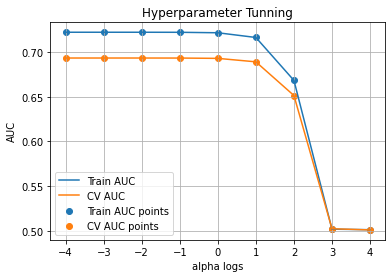

In [26]:
## Set-1
from sklearn.metrics import roc_auc_score
import math as mt
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
log_alpha = []
alpha = [10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]
for i in tqdm(alpha):
    log_alpha.append(mt.log10(i))
    nb = MultinomialNB(alpha=i, class_prior = [0.5, 0.5])
    nb.fit(X_tr_bow, y_train)

    y_train_pred = batch_predict(nb, X_tr_bow)    
    y_cv_pred = batch_predict(nb, X_cr_bow)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

print(log_alpha)
plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha logs")
plt.ylabel("AUC")
plt.title("Hyperparameter Tunning")
plt.grid()

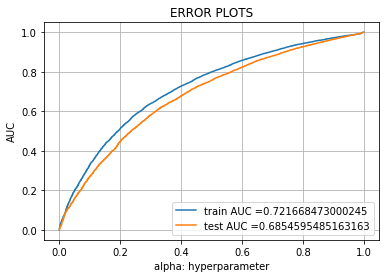

In [29]:
nb = MultinomialNB(alpha=1)
nb.fit(X_tr_bow, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb, X_tr_bow)    
y_test_pred = batch_predict(nb, X_te_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()

**Source**

*   https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels
*   https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
*   https://datascience.stackexchange.com/questions/57245/seaborn-heatmap-not-displaying-correctly

Text(0.5, 1.0, 'Confusion Matrix')

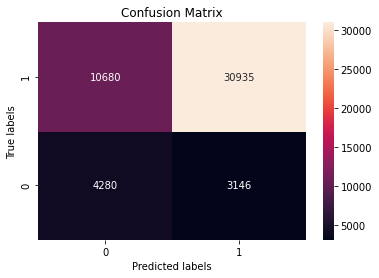

In [32]:
cmset1 = confusion_matrix(y_train, nb.predict(X_tr_bow))
ax = plt.subplot()
sns.heatmap(cmset1, annot=True, ax=ax, fmt='g')
ax.set_ylim([0,2])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

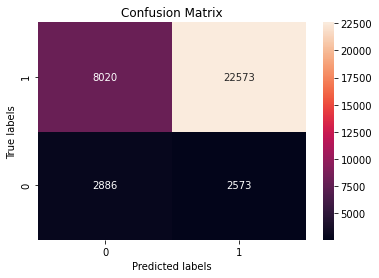

In [33]:
cmset1_2 = confusion_matrix(y_test, nb.predict(X_te_bow))
ax = plt.subplot()
sns.heatmap(cmset1_2, annot=True, ax=ax, fmt='g')
ax.set_ylim([0,2])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [35]:
##20 positive features 
pos_class_prob_sorted = nb.feature_log_prob_[1, :].argsort()
print(pos_class_prob_sorted[:20])
print('*' * 50)
print(np.take(unique_words_bow, pos_class_prob_sorted[:20]))

[5051 5046 5050 5028 5026 5041 5039 5060 5000 5008 5029 5030 5007 5011
 5049 4240 4460 5032 4438 5021]
**************************************************
['adhd' 'actively' 'adding' 'ability' 'abc' 'achieving' 'achieve' 'air'
 '000' '16' 'able' 'aboard' '123' '2017' 'add' 'students use materials'
 'these materials allow' 'above' 'the supplies' '5th']


In [36]:
## 20 negative features

neg_class_prob_sorted = nb.feature_log_prob_[0, :].argsort()
print(neg_class_prob_sorted[:20])
print('*' * 50)
print(np.take(unique_words_bow, neg_class_prob_sorted[:20]))

[5051  647 5028 5050 5046 4463 4456 4440 5008  912 3959  649 5039 4271
 5029  594 4454 4413  593  650]
**************************************************
['adhd' 'chromebooks allow' 'ability' 'adding' 'actively' 'these stools'
 'these chromebooks' 'the wobble' '16' 'core muscles' 'stools allow'
 'chromebooks students' 'achieve' 'sturdy' 'able' 'chairs help'
 'these chairs' 'the chromebooks' 'chairs allow' 'chromebooks would']


100%|██████████| 9/9 [00:02<00:00,  4.13it/s]


[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


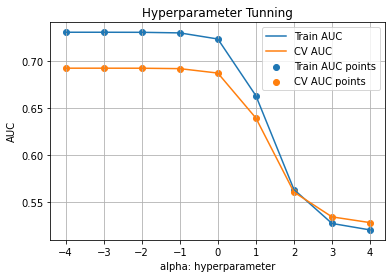

In [37]:
## Set-2

from sklearn.metrics import roc_auc_score
"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
log_alpha = []
alpha = [10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]
for i in tqdm(alpha):
    log_alpha.append(mt.log10(i))
    nb = MultinomialNB(alpha=i, class_prior = [0.5, 0.5])
    nb.fit(X_tr_tfidf, y_train)

    y_train_pred = batch_predict(nb, X_tr_tfidf)    
    y_cv_pred = batch_predict(nb, X_cr_tfidf)

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))

print(log_alpha)
plt.plot(log_alpha, train_auc, label='Train AUC')
plt.plot(log_alpha, cv_auc, label='CV AUC')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter Tunning")
plt.grid()

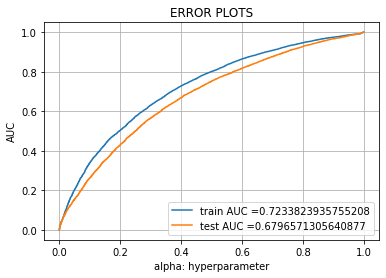

In [38]:
nb = MultinomialNB(alpha=1)
nb.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb, X_tr_tfidf)    
y_test_pred = batch_predict(nb, X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()

Text(0.5, 1.0, 'Confusion Matrix')

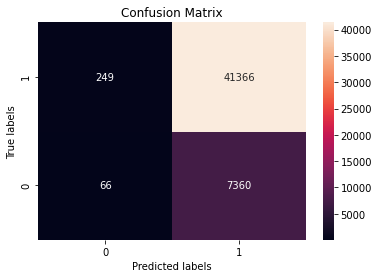

In [39]:
cmset2 = confusion_matrix(y_train, nb.predict(X_tr_tfidf))
ax = plt.subplot()
sns.heatmap(cmset2, annot=True, ax=ax, fmt='g')
ax.set_ylim([0,2])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

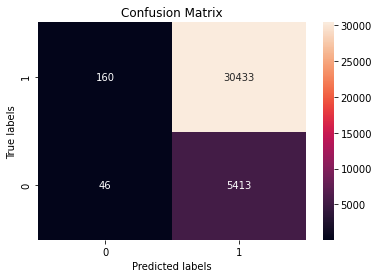

In [40]:
cmset2_1 = confusion_matrix(y_test, nb.predict(X_te_tfidf))
ax = plt.subplot()
sns.heatmap(cmset2_1, annot=True, ax=ax, fmt='g')
ax.set_ylim([0,2])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

**Reference: http://zetcode.com/python/prettytable/**

In [42]:
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("Vectorizer", "Model", "HyperParameter", "train_AUC","Test_AUC")
tb.add_row(["BOW", "Auto", 1,0.72,0.68 ])
tb.add_row(["Tf-Idf", "Auto", 1,0.72,0.67])
print(tb.get_string(titles = "Naive Bayes - Observations"))

+------------+-------+----------------+-----------+----------+
| Vectorizer | Model | HyperParameter | train_AUC | Test_AUC |
+------------+-------+----------------+-----------+----------+
|    BOW     |  Auto |       1        |    0.72   |   0.68   |
|   Tf-Idf   |  Auto |       1        |    0.72   |   0.67   |
+------------+-------+----------------+-----------+----------+
